In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


In [2]:
# Load in cleaned data
df_train = pd.read_csv("train_df_clean.csv")
df_test = pd.read_csv("test_df_clean.csv")

# Load in cleaned data without normalization
# df_train_no_norm = pd.read_csv("train_df_clean_no_norm.csv")
# df_test_no_norm = pd.read_csv("test_df_clean_no_norm.csv")


# Section 1

## Q1:

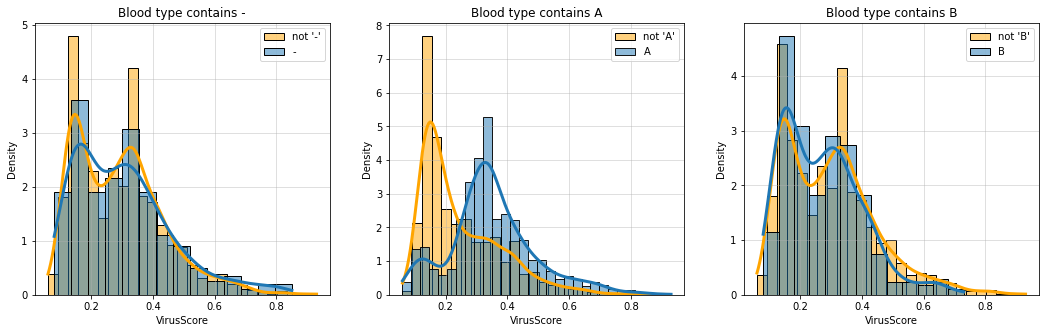

In [3]:
X_train = df_train.drop('VirusScore', axis=1)
y_train = df_train["VirusScore"]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
for i, cur_type in enumerate(['-', 'A', 'B']):
    filter_mask = X_train['blood_type'].str.contains(cur_type)
    sns.histplot(data=y_train[~filter_mask], ax=ax[i], stat="density", kde=True,
                 line_kws={"linewidth": 3}, color="orange", label="not '{}'".format(cur_type))
    sns.histplot(data=y_train[filter_mask], ax=ax[i], stat="density", kde=True,
                 line_kws={"linewidth": 3}, label=cur_type)
    ax[i].set_title("Blood type contains " + cur_type)
    ax[i].legend(), ax[i].grid(alpha=0.5)

In [4]:
# drop blood_type feature. No need to create new feature since already have it.

df_train.drop('blood_type', axis='columns', inplace=True)
df_test.drop('blood_type', axis='columns', inplace=True)

## post Q3:

In [5]:
df_train_new = df_train.sample(frac=0.8, random_state=16)
df_train_new_val = df_train.drop(df_train_new.index)

In [6]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegressor(BaseEstimator, RegressorMixin):
    """
    Custom linear regression model
    """
def __init__(self, lr: float = 1e-5):
    """
    Initialize an instance of this class.
    ** Do not edit this method **

    :param lr: the SGD learning rate (step size)
    """
    self.lr = lr
    self.batch_size = 32
    self.w = None
    self.b = 0.0

# Initialize a random weight vector
def init_solution(self, n_features: int):
    """
    Randomize an initial solution (weight vector)
    ** Do not edit this method **

    :param n_features:
    """
    self.w = np.zeros(n_features)
    self.b = 0.0

@staticmethod
def loss(w, b: float, X, y):
    """
    Compute the MSE objective loss.

    :param w: weight vector for linear regression; array of shape (n_features,)
    :param b: bias scalar for linear regression
    :param X: samples for loss computation; array of shape (n_samples, n_features)
    :param y: targets for loss computation; array of shape (n_samples,)
    :return: the linear regression objective loss (float scalar)
    """

    weighted_samples = np.multiply(X,w)
    inner_exp = weighted_samples + (np.ones_like(weighted_samples) * b) - y
    norm_exp = np.linalg.norm(inner_exp)
    reg = norm_exp ** 2
    loss_mse = reg / y.shape(1)

    return loss_mse

@staticmethod
def gradient(w, b: float, X, y):
    """
    Compute the (analytical) linear regression objective gradient.

    :param w: weight vector for linear regression; array of shape (n_features,)
    :param b: bias scalar for linear regression
    :param X: samples for loss computation; array of shape (n_samples, n_features)
    :param y: targets for loss computation; array of shape (n_samples,)
    :return: a tuple with (the gradient of the weights, the gradient of the bias)
    """
    # TODO: calculate the analytical gradient w.r.t w and b
    g_w = None
    g_b = 0.0

    return g_w, g_b

def fit_with_logs(self, X, y, max_iter: int = 1000, keep_losses: bool = True,
                  X_val  =None, y_val = None):
    """
    Fit the model according to the given training data.

    :param X: training samples; array of shape (n_samples, n_features)
    :param y: training targets; array of shape (n_samples,)
    :param max_iter: number of SGD iterations
    :param keep_losses: should compute the train & val losses during training?
    :param X_val: validation samples to compute the loss for (for logs only)
    :param y_val: validation labels to compute the loss for (for logs only)
    :return: training and validation losses during training
    """
    # Initialize learned parameters
    self.init_solution(X.shape[1])

    train_losses = []
    val_losses = []

    if keep_losses:
        train_losses.append(self.loss(self.w, self.b, X, y))
        val_losses.append(self.loss(self.w, self.b, X_val, y_val))

    # Iterate over batches (SGD)
    for itr in range(0, max_iter):
        start_idx = (itr * self.batch_size) % X.shape[0]
        end_idx = min(X.shape[0], start_idx + self.batch_size)
        batch_X = X[start_idx: end_idx]
        batch_y = y[start_idx: end_idx]

        # TODO: Compute the gradient for the current *batch*
        g_w, g_b = None, None

        # Perform a gradient step
        # TODO: update the learned parameters correctly
        self.w = None
        self.b = 0.0

        if keep_losses:
            train_losses.append(self.loss(self.w, self.b,  X, y))
            val_losses.append(self.loss(self.w, self.b,  X_val, y_val))

    return train_losses, val_losses

def fit(self, X, y, max_iter: int = 1000):
    """
    Fit the model according to the given training data.
    ** Do not edit this method **

    :param X: training samples; array of shape (n_samples, n_features)
    :param y: training targets; array of shape (n_samples,)
    :param max_iter: number of SGD iterations
    """
    self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

    return self

def predict(self, X):
    """
    Regress labels on samples in X.

    :param X: samples for prediction; array of shape (n_samples, n_features)
    :return: Predicted continuous labels for samples in X; array of shape (n_samples,)
    """

    # TODO: Compute
    y_pred = None

    return y_pred